In [ ]:
!wget https://raw.githubusercontent.com/ksylvia16/Phishing-URL-Detection/main/data/url_original.csv

--2023-05-26 04:01:55--  https://raw.githubusercontent.com/ksylvia16/Phishing-URL-Detection/main/data/url_original.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6678733 (6.4M) [text/plain]
Saving to: ‘url_original.csv’

url_original.csv    100%[===================>]   6.37M  --.-KB/s    in 0.08s   

2023-05-26 04:01:55 (82.2 MB/s) - ‘url_original.csv’ saved [6678733/6678733]



In [ ]:
import pandas as pd
df = pd.read_csv('url_original.csv', on_bad_lines='skip')

In [ ]:
df.head()

,domain,label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,1.0
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,1.0
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,1.0
3,mail.printakid.com/www.online.americanexpress....,1.0
4,thewhiskeydregs.com/wp-content/themes/widescre...,1.0


In [ ]:
df.label.isna().value_counts()

False    95913
True        92
Name: label, dtype: int64

In [ ]:
df.label.value_counts()

0.0    48009
1.0    47904
Name: label, dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.label.isna().value_counts()

False    95913
Name: label, dtype: int64

In [ ]:
df.label.dtype

dtype('float64')

In [ ]:
df.label = df.label.astype('int64')
df.label.dtype

dtype('int64')

In [ ]:
df.label.value_counts()

0    48009
1    47904
Name: label, dtype: int64

In [ ]:
l = df.label.value_counts()
l

0    48009
1    47904
Name: label, dtype: int64

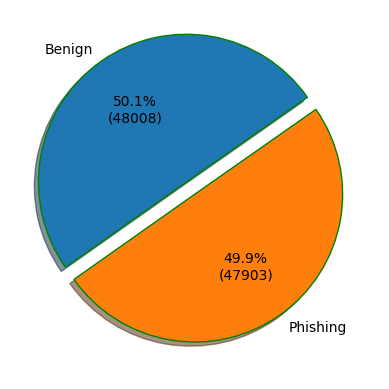

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Creating autocpt arguments
def func(cls, allvalues):
    absolute = int(cls / 100.*df.shape[0])
    return "{:.1f}%\n({:d})".format(cls, absolute)

explode = (0.1, 0.0)

# Wedge properties
wp = { 'linewidth' : 1, 'edgecolor' : "green" }

plt.pie((l/df.shape[0])*100,
        labels=['Benign', 'Phishing'],
        autopct= lambda pct: func(pct, l),
        shadow = True,
        startangle = 35,
        explode = explode,
        wedgeprops = wp)

plt.show()

In [ ]:
print(df.iloc[1000])

domain    'login.paypal.com.ummiecollections.com/Nouveau...
label                                                     1
Name: 1000, dtype: object


In [ ]:
vocab = {}
max_len = 0
sen_len = []

for row in df.iterrows():
  max_len = max(max_len, len(row[1]['domain']))
  sen_len.append(len(row[1]['domain']))
  for ch in row[1]['domain']:
    if ch not in vocab.keys():
      vocab[ch] = 1
    else:
      vocab[ch] += 1

In [ ]:
vocab

{'n': 219384,
 'o': 289864,
 'b': 124179,
 'e': 383206,
 'l': 188313,
 '.': 313531,
 'i': 241397,
 't': 260788,
 '/': 285364,
 '7': 60221,
 '0': 87240,
 'f': 111676,
 '5': 80468,
 '2': 84597,
 'd': 188747,
 '9': 59580,
 '1': 89793,
 'c': 274429,
 'a': 319155,
 '6': 69304,
 '4': 74644,
 '3': 96615,
 '8': 80972,
 'g': 118175,
 'S': 14119,
 'k': 46297,
 'y': 52688,
 'P': 14252,
 'm': 237192,
 '-': 62875,
 'v': 39113,
 'r': 205500,
 'x': 40972,
 'p': 179076,
 'h': 119938,
 '?': 22538,
 '=': 40912,
 '_': 28030,
 '&': 20972,
 'u': 116744,
 's': 240104,
 'w': 205123,
 'j': 27422,
 'z': 21522,
 'H': 9456,
 'D': 15626,
 'J': 8591,
 'N': 13168,
 ';': 17934,
 'E': 11648,
 'V': 9826,
 'B': 12064,
 'R': 10615,
 'M': 13048,
 'Q': 9431,
 'L': 11925,
 'I': 12909,
 '~': 5444,
 'Z': 9197,
 'O': 10206,
 'X': 8611,
 'T': 11642,
 'F': 15282,
 'U': 10291,
 'C': 11788,
 'A': 16126,
 'q': 14426,
 'G': 10279,
 'Y': 10222,
 'K': 7513,
 "'": 7816,
 '\\': 12802,
 '%': 12789,
 ' ': 296,
 'W': 10025,
 ':': 1273,
 '

In [ ]:
for key in vocab.copy():
  if vocab[key]<=10:
    vocab.pop(key)

len(vocab)

NameError: ignored

In [ ]:
input_id = {}
id2char = {}
i=1
for key in vocab:
  if key != ' ' and key != '�':
    input_id[key] = i
    id2char[i] = key
    i += 1

In [ ]:
input_id['<pad>'] = 0
input_id['<unk>'] = i

id2char[0] = '<pad>'
id2char[i] = '<unk>'

In [ ]:
input_id

{'n': 1,
 'o': 2,
 'b': 3,
 'e': 4,
 'l': 5,
 '.': 6,
 'i': 7,
 't': 8,
 '/': 9,
 '7': 10,
 '0': 11,
 'f': 12,
 '5': 13,
 '2': 14,
 'd': 15,
 '9': 16,
 '1': 17,
 'c': 18,
 'a': 19,
 '6': 20,
 '4': 21,
 '3': 22,
 '8': 23,
 'g': 24,
 'S': 25,
 'k': 26,
 'y': 27,
 'P': 28,
 'm': 29,
 '-': 30,
 'v': 31,
 'r': 32,
 'x': 33,
 'p': 34,
 'h': 35,
 '?': 36,
 '=': 37,
 '_': 38,
 '&': 39,
 'u': 40,
 's': 41,
 'w': 42,
 'j': 43,
 'z': 44,
 'H': 45,
 'D': 46,
 'J': 47,
 'N': 48,
 ';': 49,
 'E': 50,
 'V': 51,
 'B': 52,
 'R': 53,
 'M': 54,
 'Q': 55,
 'L': 56,
 'I': 57,
 '~': 58,
 'Z': 59,
 'O': 60,
 'X': 61,
 'T': 62,
 'F': 63,
 'U': 64,
 'C': 65,
 'A': 66,
 'q': 67,
 'G': 68,
 'Y': 69,
 'K': 70,
 "'": 71,
 '\\': 72,
 '%': 73,
 'W': 74,
 ':': 75,
 '@': 76,
 '#': 77,
 '+': 78,
 '(': 79,
 ')': 80,
 ',': 81,
 '!': 82,
 '[': 83,
 ']': 84,
 '*': 85,
 '^': 86,
 '|': 87,
 '$': 88,
 '<pad>': 0,
 '<unk>': 89}

(array([9.2329e+04, 3.4820e+03, 8.2000e+01, 4.0000e+00, 1.4000e+01,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([   9. ,  225.6,  442.2,  658.8,  875.4, 1092. , 1308.6, 1525.2,
        1741.8, 1958.4, 2175. ]),
 <BarContainer object of 10 artists>)

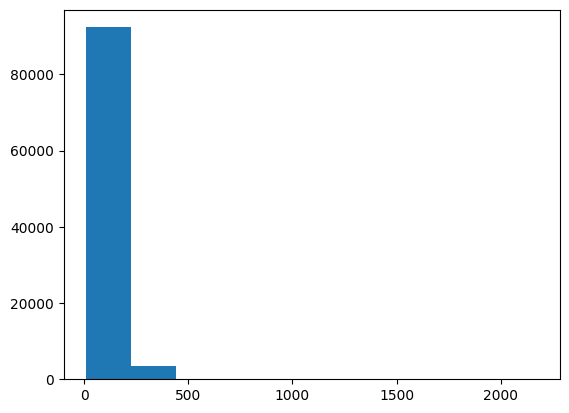

In [ ]:
plt.hist(sen_len)

In [ ]:
fixed_sen_len = 120

### Dataset-split&creation

In [ ]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=0.3, random_state=0) # 70% training : 30% test
df_val, df_test = train_test_split(df_test, test_size=0.5, random_state=0) # 15% validation : 15% test

len(df_train), len(df_val), len(df_test)

(67139, 14387, 14387)

In [ ]:
import tensorflow as tf

class PhisingDataset(tf.keras.utils.Sequence):
    def __init__(self, dataframe, vocab, fixed_sen_len):
        self.dataframe = dataframe
        self.fixed_sen_len = fixed_sen_len
        self.vocab = vocab

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, index):
        domain, label = self.dataframe.iloc[index]
        # label_categorical = tf.one_hot(label, 2)

        url_indices = [input_id[char] if char in self.vocab.keys() else self.vocab['<unk>'] for char in domain]
        # [www.google.com~] [3 3 3 5 10 1 1 10 7 8 5 6 1 4 89 0 0 0 0 0 ...] 120
        # padded_sequences = tf.keras.preprocessing.sequence.pad_sequences(url_indices, maxlen=self.fixed_sen_len)
        padded_sequences = tf.keras.utils.pad_sequences([url_indices], padding='post', truncating='post', maxlen=fixed_sen_len)
        padded_sequences = padded_sequences[0]

        return padded_sequences, label

In [ ]:
# Define the batch size
batch_size = 16

In [ ]:
phising_dataset_train = PhisingDataset(df_train, input_id, fixed_sen_len)
phising_dataset_val = PhisingDataset(df_val, input_id, fixed_sen_len)
phising_dataset_test = PhisingDataset(df_test, input_id, fixed_sen_len)

In [ ]:
# Create a TensorFlow dataset from the custom dataset
tf_dataset_train = tf.data.Dataset.from_generator(lambda: phising_dataset_train,
                                                  output_signature=(tf.TensorSpec(shape=(fixed_sen_len, ), dtype=tf.int32),
                                                                    tf.TensorSpec(shape=(), dtype=tf.int32)))

tf_dataset_val = tf.data.Dataset.from_generator(lambda: phising_dataset_val,
                                                output_signature=(tf.TensorSpec(shape=(fixed_sen_len,), dtype=tf.int32),
                                                                  tf.TensorSpec(shape=(), dtype=tf.int32)))

tf_dataset_test = tf.data.Dataset.from_generator(lambda: phising_dataset_test,
                                                 output_signature=(tf.TensorSpec(shape=(fixed_sen_len,), dtype=tf.int32),
                                                                    tf.TensorSpec(shape=(), dtype=tf.int32)))

In [ ]:
# Shuffle and batch the dataset
tf_dataset_train = tf_dataset_train.shuffle(len(df_train)).batch(batch_size)

tf_dataset_val = tf_dataset_val.shuffle(len(df_val)).batch(batch_size)

tf_dataset_test = tf_dataset_test.shuffle(len(df_test)).batch(batch_size)

In [ ]:
for batch_domains, batch_labels in tf_dataset_train:
  print(batch_domains.shape, batch_labels.shape)
  break

(16, 120) (16,)


### normal attention

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Conv1D, Embedding, Input, GlobalAveragePooling1D, Concatenate, GlobalMaxPooling1D, LSTM, Dense, concatenate, Attention, Bidirectional
from tensorflow.keras.optimizers import Adam

In [ ]:
from tensorflow.keras.layers import Input, Embedding, Conv1D, GlobalMaxPooling1D, concatenate, Dense, Dropout, Bidirectional, LSTM, Add, LayerNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.layers import MultiHeadAttention
import tensorflow as tf

def create_model(vocab_size, embedding_dim, input_length):
    # Input layer
    inputs = Input(shape=(input_length,))

    # Embedding layer
    embedding_layer = Embedding(input_dim=vocab_size,
                                output_dim=embedding_dim,
                                input_length=input_length,
                                trainable=True)
    embedded_sequences = embedding_layer(inputs)

    # Convolutional Neural Network (CNN) layers
    cnn_filters = [128, 128, 128]
    cnn_kernel_sizes = [3, 4, 5]
    conv_outputs = []

    for i in range(len(cnn_filters)):
        conv_layer = Conv1D(filters=cnn_filters[i],
                            kernel_size=cnn_kernel_sizes[i],
                            activation='relu')(embedded_sequences)

        attented_feature = MultiHeadAttention(num_heads=3, key_dim=2)(embedded_sequences, conv_layer, conv_layer)

        pool_layer = GlobalMaxPooling1D()(attented_feature)
        conv_outputs.append(pool_layer)

    cnn_output = Concatenate()(conv_outputs)

    # LSTM layer
    bilstm_units = 64
    lstm_layer = tf.keras.layers.LSTM(64, return_sequences=True)
    bilstm_layer_1 = Bidirectional(lstm_layer)(embedded_sequences)
    bilstm_output = GlobalMaxPooling1D()(bilstm_layer_1)

    # Concatenate CNN and LSTM outputs
    concatenated = concatenate([cnn_output, bilstm_output])

    # Fully connected layers
    fc1 = Dense(64, activation='relu')(concatenated)
    dropout = Dropout(0.5)(fc1)
    fc2 = Dense(32, activation='relu')(dropout)

    # Classifier
    output = Dense(1, activation='sigmoid')(fc2)

    model = Model(inputs=inputs, outputs=output)

    return model

In [ ]:
model = create_model(len(vocab), 90, fixed_sen_len)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 120)]        0           []                               
                                                                                                  
 embedding (Embedding)          (None, 120, 90)      8100        ['input_1[0][0]']                
                                                                                                  
 conv1d (Conv1D)                (None, 118, 128)     34688       ['embedding[0][0]']              
                                                                                                  
 conv1d_1 (Conv1D)              (None, 117, 128)     46208       ['embedding[0][0]']              
                                                                                              

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
             loss=tf.keras.losses.BinaryCrossentropy(),
             metrics=['accuracy'])

In [ ]:
history = model.fit(tf_dataset_train,
                    validation_data=tf_dataset_val,
                    epochs=20)

Epoch 1/20
4197/4197 [==============================] - 139s 23ms/step - loss: 0.2375 - accuracy: 0.9008 - val_loss: 0.1584 - val_accuracy: 0.9380
Epoch 2/20
4197/4197 [==============================] - 114s 22ms/step - loss: 0.1115 - accuracy: 0.9601 - val_loss: 0.1812 - val_accuracy: 0.9272
Epoch 3/20
4197/4197 [==============================] - 104s 19ms/step - loss: 0.0852 - accuracy: 0.9694 - val_loss: 0.0843 - val_accuracy: 0.9698
Epoch 4/20
4197/4197 [==============================] - 104s 19ms/step - loss: 0.0717 - accuracy: 0.9746 - val_loss: 0.0759 - val_accuracy: 0.9725
Epoch 5/20
4197/4197 [==============================] - 104s 19ms/step - loss: 0.0601 - accuracy: 0.9785 - val_loss: 0.0764 - val_accuracy: 0.9734
Epoch 6/20
4197/4197 [==============================] - 104s 19ms/step - loss: 0.0512 - accuracy: 0.9822 - val_loss: 0.0686 - val_accuracy: 0.9767
Epoch 7/20
4197/4197 [==============================] - 114s 22ms/step - loss: 0.0450 - accuracy: 0.9841 - val_loss: 0

In [ ]:
eval = model.evaluate(tf_dataset_test)
eval

900/900 [==============================] - 16s 11ms/step - loss: 0.0877 - accuracy: 0.9807


[0.08772590011358261, 0.9806770086288452]

In [ ]:
model.save('/content/drive/MyDrive/cnn_lstm_attention_final.h5')

In [ ]:
y_pred, y_test = [], []
for idx, row in df_test.iterrows():
  domain, label = row
  url_indices = [input_id[char] if char in input_id.keys() else input_id['<unk>'] for char in domain]
  padded_sequences = tf.keras.utils.pad_sequences([url_indices], padding='post', truncating='post', maxlen=fixed_sen_len)
  # padded_sequences = padded_sequences[0]
  y_pred.append(model.predict(padded_sequences, verbose=0)>0.5)
  y_test.append(label)

In [ ]:
# from itertools import chain
# y_pred = list(chain(*y_pred))
# y_pred = list(chain(*y_pred))
y_pred = [0 if x==False else 1 for x in y_pred]
y_pred[:5]

[1, 0, 1, 0, 0]

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      7204
           1       0.98      0.98      0.98      7183

    accuracy                           0.98     14387
   macro avg       0.98      0.98      0.98     14387
weighted avg       0.98      0.98      0.98     14387



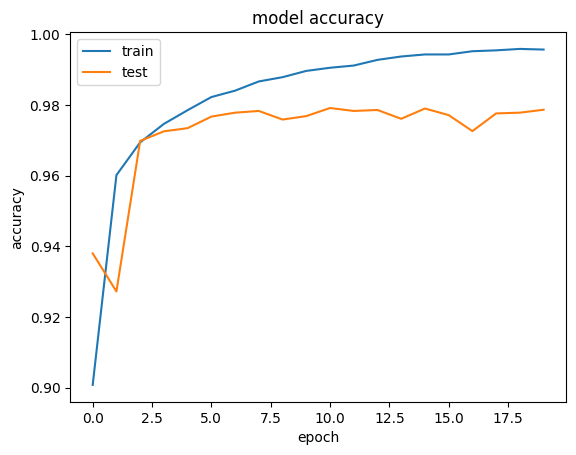

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

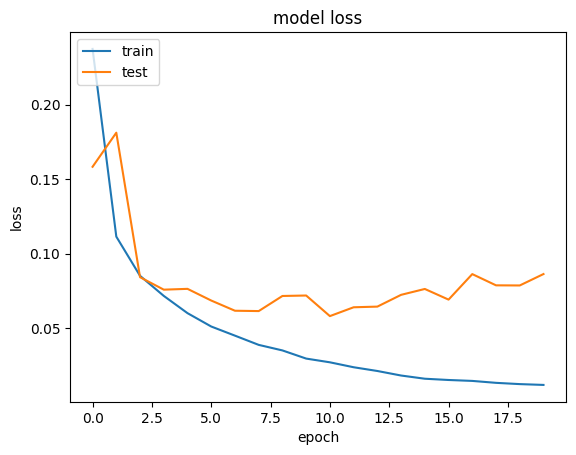

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

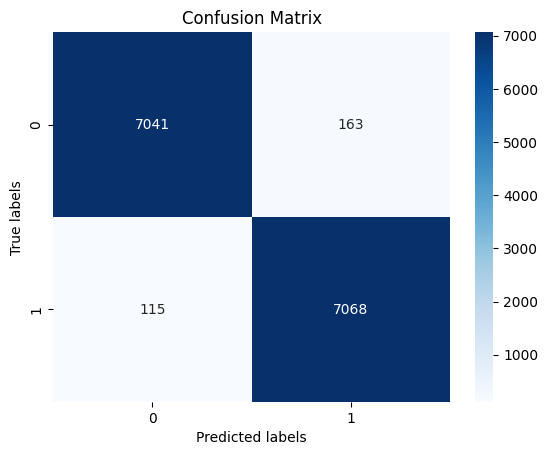

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

# Set labels, title, and ticks
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")

plt.show()

### multihead attention

In [ ]:
from tensorflow.keras.layers import Input, Embedding, Conv1D, GlobalMaxPooling1D, concatenate, Dense, Dropout, Bidirectional, LSTM, Add, LayerNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.layers import MultiHeadAttention
import tensorflow as tf

def create_model(vocab_size, embedding_dim, input_length):
    # Input layer
    inputs = Input(shape=(input_length,))

    # Embedding layer
    embedding_layer = Embedding(input_dim=vocab_size,
                                output_dim=embedding_dim,
                                input_length=input_length,
                                trainable=True)
    embedded_sequences = embedding_layer(inputs)

    cnn_filters = [128, 128, 128]
    cnn_kernel_sizes = [3, 4, 5]
    conv_outputs = []

    for i in range(len(cnn_filters)):
        conv_layer = Conv1D(filters=cnn_filters[i],
                            kernel_size=cnn_kernel_sizes[i],
                            activation='relu')(embedded_sequences)

        attented_feature = MultiHeadAttention(num_heads=3, key_dim=2)(embedded_sequences, conv_layer, conv_layer)

        # conv_in = Add()([embedded_sequences, conv_in])

        # conv_in = LayerNormalization()(conv_in)

        pool_layer = GlobalMaxPooling1D()(attented_feature)
        conv_outputs.append(pool_layer)

    cnn_output = concatenate(conv_outputs)

    # BiLSTM layer
    bilstm_units = 64
    lstm_layer = LSTM(bilstm_units, return_sequences=True)
    bilstm_layer = Bidirectional(lstm_layer)(embedded_sequences)

    pool_layer_2 = GlobalMaxPooling1D()(bilstm_layer)

    # Concatenate CNN output and attention output
    concatenated = concatenate([cnn_output, pool_layer_2])

    # Fully connected layers
    fc1 = Dense(64, activation='relu')(concatenated)
    dropout = Dropout(0.5)(fc1)
    fc2 = Dense(32, activation='relu')(dropout)

    # Classifier
    output = Dense(1, activation='sigmoid')(fc2)

    model = Model(inputs=inputs, outputs=output)

    return model


In [ ]:
model = create_model(len(vocab), 90, fixed_sen_len)
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 120)]        0           []                               
                                                                                                  
 embedding_4 (Embedding)        (None, 120, 90)      8100        ['input_5[0][0]']                
                                                                                                  
 conv1d_10 (Conv1D)             (None, 118, 128)     34688       ['embedding_4[0][0]']            
                                                                                                  
 conv1d_11 (Conv1D)             (None, 117, 128)     46208       ['embedding_4[0][0]']            
                                                                                            

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
             loss=tf.keras.losses.BinaryCrossentropy(),
             metrics=['accuracy'])

history = model.fit(tf_dataset_train,
                    validation_data=tf_dataset_val,
                    epochs=20)

Epoch 1/20
4197/4197 [==============================] - 129s 22ms/step - loss: 0.2372 - accuracy: 0.9015 - val_loss: 0.1366 - val_accuracy: 0.9477
Epoch 2/20
4197/4197 [==============================] - 113s 21ms/step - loss: 0.1165 - accuracy: 0.9576 - val_loss: 0.1052 - val_accuracy: 0.9625
Epoch 3/20
4197/4197 [==============================] - 110s 21ms/step - loss: 0.0861 - accuracy: 0.9685 - val_loss: 0.0866 - val_accuracy: 0.9682
Epoch 4/20
4197/4197 [==============================] - 110s 21ms/step - loss: 0.0734 - accuracy: 0.9741 - val_loss: 0.0803 - val_accuracy: 0.9701
Epoch 5/20
4197/4197 [==============================] - 113s 21ms/step - loss: 0.0613 - accuracy: 0.9780 - val_loss: 0.0864 - val_accuracy: 0.9691
Epoch 6/20
4197/4197 [==============================] - 114s 22ms/step - loss: 0.0542 - accuracy: 0.9809 - val_loss: 0.0729 - val_accuracy: 0.9732
Epoch 7/20
4197/4197 [==============================] - 110s 21ms/step - loss: 0.0457 - accuracy: 0.9833 - val_loss: 0

In [ ]:
eval = model.evaluate(tf_dataset_test)
eval

900/900 [==============================] - 11s 6ms/step - loss: 0.0776 - accuracy: 0.9803


[0.07763513922691345, 0.9802599549293518]

In [ ]:
y_pred, y_test = [], []
for idx, row in df_test.iterrows():
  domain, label = row
  url_indices = [input_id[char] if char in input_id.keys() else input_id['<unk>'] for char in domain]
  padded_sequences = tf.keras.utils.pad_sequences([url_indices], padding='post', truncating='post', maxlen=fixed_sen_len)
  # padded_sequences = padded_sequences[0]
  y_pred.append(model.predict(padded_sequences, verbose=0)>0.5)
  y_test.append(label)

In [ ]:
y_pred = [0 if x==False else 1 for x in y_pred]
y_pred[:5]

[1, 0, 1, 0, 0]

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      7204
           1       0.99      0.97      0.98      7183

    accuracy                           0.98     14387
   macro avg       0.98      0.98      0.98     14387
weighted avg       0.98      0.98      0.98     14387



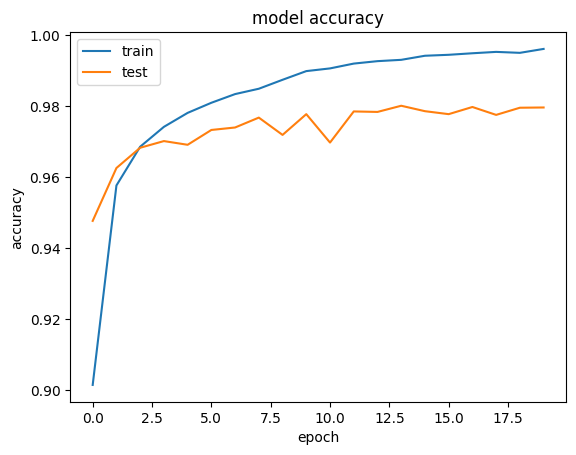

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

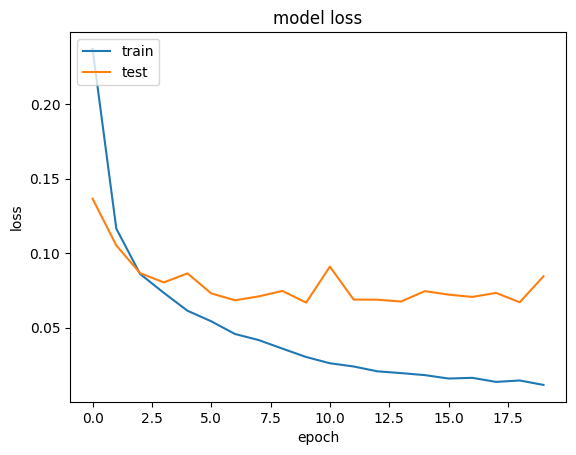

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

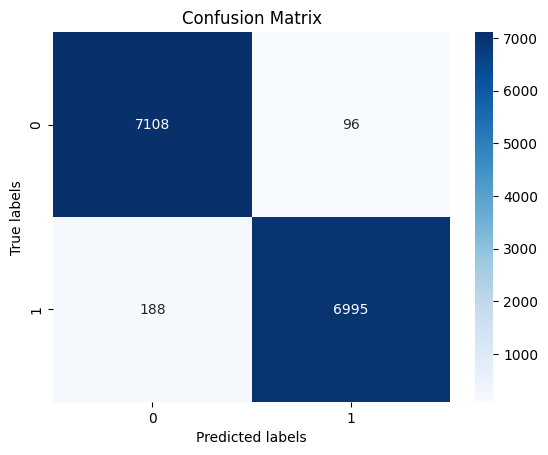

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

# Set labels, title, and ticks
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")

plt.show()

In [ ]:
model.save('/content/drive/MyDrive/cnn_bilstm_single_multihead_3_attention.h5')